# Task 1 - Retrieval of data

In [218]:
# All the imports we need to run the code
import json, requests, urllib
from pathlib import Path
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
import seaborn as sns
from collections import Counter
import squarify
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import random
import datetime

In accordance with the API list provided at https://api.nasa.gov/, we will use NASA's Near Earth Object (NEO) API. 

This API provides data on asteroids and comets that come close to Earth's orbit. It is maintained by the Center for Near Earth Object Studies (CNEOS) at NASA's Jet Propulsion Laboratory (JPL). More information can be found at https://www.nasa.gov/planetarydefense/neoo/."

The data is publicly available and can be accessed through a simple RESTful API. Unfortunately, the API has a limitation: we can only gather a small data set for a maximum of seven days. This presents our first limitation. To overcome this, we make multiple RESTful API requests and append the new NEOs (near Earth objects) to our JSON set each time.

The start and end dates can be edited depending on the data set you would like to collect.

In [222]:
start_date = datetime.date(2020, 1, 27)
end_date = datetime.date(2020, 3, 25)

delta = datetime.timedelta(days=6)
date_list = []

while start_date + delta <= end_date:
    start_date += delta
    date_list.append(start_date.strftime('%Y-%m-%d'))

#### empty_json contains all our NEO data

In [185]:
api_key = 'Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc'
empty_json = {}

for i in range(len(date_list)-1):
    start = date_list[i]
    end = date_list[i+1]
    endPoint = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start}&end_date={end}&api_key={api_key}'
    request = requests.get(endPoint)
    data = request.json()
    empty_json[start + '_' + end] = data
empty_json


{'2020-02-02_2020-02-08': {'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2020-02-08&end_date=2020-02-14&detailed=false&api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc',
   'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2020-01-27&end_date=2020-02-02&detailed=false&api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc',
   'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2020-02-02&end_date=2020-02-08&detailed=false&api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc'},
  'element_count': 135,
  'near_earth_objects': {'2020-02-02': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2103067?api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc'},
     'id': '2103067',
     'neo_reference_id': '2103067',
     'name': '103067 (1999 XA143)',
     'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2103067',
     'absolute_magnitude_h': 16.84,
     'estimated_diameter': {'kilometers': {'estimated_diameter_min': 1.1390819672,
       'estimated_diameter_

Here we get NASA's photo of the day, just for fun. It is NASA's most popular API that returns a new photo every day of some space NASA related activity. 

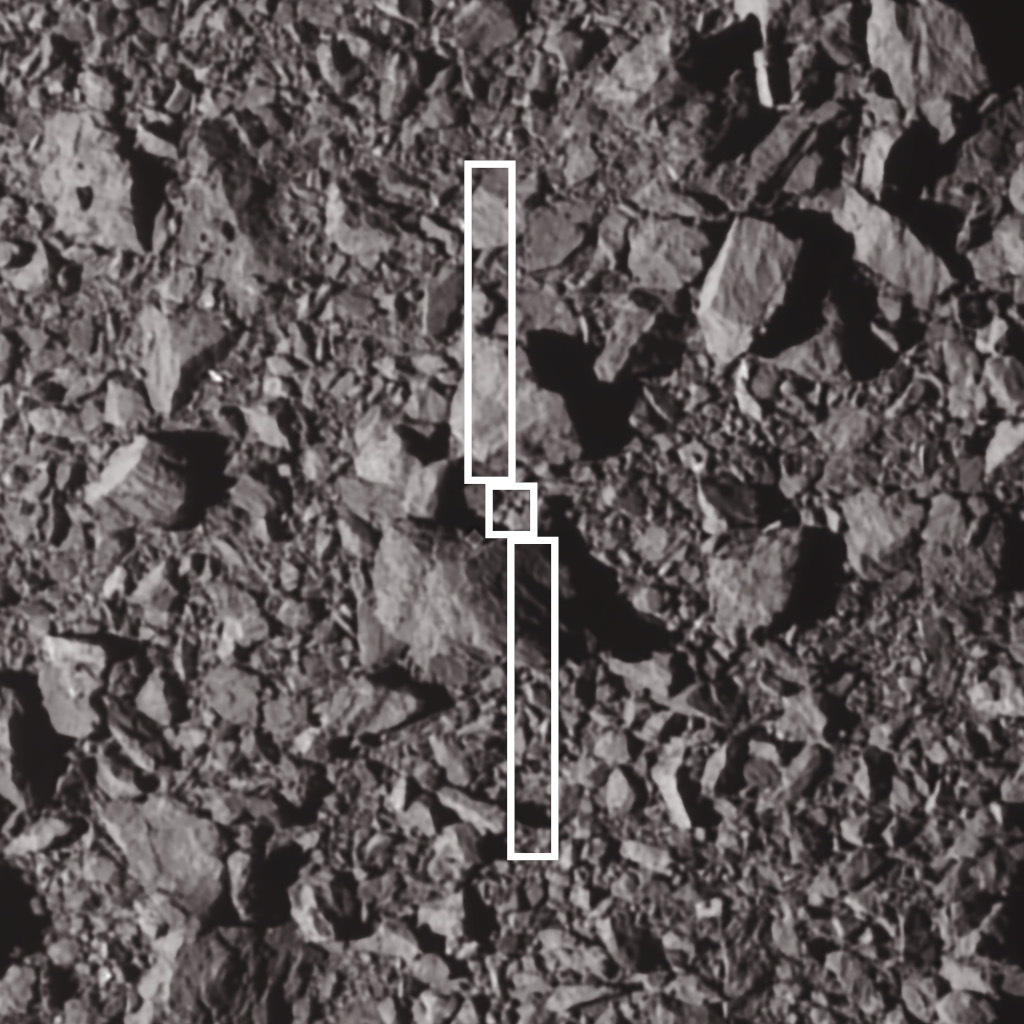

In [186]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import Image as IPImage
from IPython.display import display

# API URL
url = "https://api.nasa.gov/planetary/apod"

# API parameters
params = {
    "api_key": api_key # replace with your API key
}

# send GET request to API
response = requests.get(url, params=params)

# parse JSON response
data = response.json()

# get image URL from JSON response
image_url = data["url"]

# download image from URL
image_response = requests.get(image_url)

# create image object from bytes
image = IPImage(image_response.content)

# display image in notebook
display(image)


In [188]:
total = {
    "element_count": 0,
    "near_earth_objects": {}
}

for period in empty_json:
    for date in empty_json[period]["near_earth_objects"]:
        if date not in total["near_earth_objects"]:
            total["near_earth_objects"][date] = copy.deepcopy(empty_json[period]["near_earth_objects"][date])
        else:
            total["near_earth_objects"][date].extend(empty_json[period]["near_earth_objects"][date])
        total["element_count"] += empty_json[period]["element_count"]

output = {"total": total}


In [223]:
output

{'total': {'element_count': 6755,
  'near_earth_objects': {'2020-02-02': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2103067?api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc'},
     'id': '2103067',
     'neo_reference_id': '2103067',
     'name': '103067 (1999 XA143)',
     'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2103067',
     'absolute_magnitude_h': 16.84,
     'estimated_diameter': {'kilometers': {'estimated_diameter_min': 1.1390819672,
       'estimated_diameter_max': 2.5470647106},
      'meters': {'estimated_diameter_min': 1139.0819672164,
       'estimated_diameter_max': 2547.06471064},
      'miles': {'estimated_diameter_min': 0.7077925011,
       'estimated_diameter_max': 1.5826721463},
      'feet': {'estimated_diameter_min': 3737.1456813222,
       'estimated_diameter_max': 8356.5117852563}},
     'is_potentially_hazardous_asteroid': True,
     'close_approach_data': [{'close_approach_date': '2020-02-02',
       'close_approach_date_full': '2020-

In [190]:
asteroid_list = output['total']
dates = list(output['total']['near_earth_objects'].keys())
dates
asteroid_list

{'element_count': 6755,
 'near_earth_objects': {'2020-02-02': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2103067?api_key=Zy0KEjh7yatP1bj69QAGsbuXjCAuEAgiTacrtvCc'},
    'id': '2103067',
    'neo_reference_id': '2103067',
    'name': '103067 (1999 XA143)',
    'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2103067',
    'absolute_magnitude_h': 16.84,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 1.1390819672,
      'estimated_diameter_max': 2.5470647106},
     'meters': {'estimated_diameter_min': 1139.0819672164,
      'estimated_diameter_max': 2547.06471064},
     'miles': {'estimated_diameter_min': 0.7077925011,
      'estimated_diameter_max': 1.5826721463},
     'feet': {'estimated_diameter_min': 3737.1456813222,
      'estimated_diameter_max': 8356.5117852563}},
    'is_potentially_hazardous_asteroid': True,
    'close_approach_data': [{'close_approach_date': '2020-02-02',
      'close_approach_date_full': '2020-Feb-02 23:35',
      'epoch

### Task 2 - Data Pre-processing
The data is saved and processed so that we can easily access the attributes we wish to know about. We parse the JSON object and retrieve the interesting attributes of NEOs. They are sorted into two groups: hazardous and non hazardous NEOs. I want to see what qualities a hazardous NEO has and compare it to non-hazardous NEOs later on.


### Task 1 - Saving data set in array format

#### Data Cleaning and Categorization
We clean and format the data into two categories: NEOs that are potentially dangerous and those that are not dangerous. We collect data on each of these near-Earth objects, namely their absolute magnitude, size, velocity, and distance. Distance here refers to miss distance, which is by how much they will miss Earth by (the closest the object comes to hitting Earth in kilometers).

We now have a dataset of hazardous and non-hazardous objects in an appropriate format.

In [227]:
# Parse data
non_hazard = 0
non_hazardous_asteroids =[]
hazardous_asteroids = []
for date in asteroid_list["near_earth_objects"]:
    for date in dates:
        for asteroid in asteroid_list["near_earth_objects"][date]:
            if asteroid["is_potentially_hazardous_asteroid"]:
                brightness = asteroid["absolute_magnitude_h"]
                size_min = asteroid["estimated_diameter"]["kilometers"]["estimated_diameter_min"]
                size_max = asteroid["estimated_diameter"]["kilometers"]["estimated_diameter_max"]
                velocity = asteroid["close_approach_data"][0]["relative_velocity"]["kilometers_per_second"]
                distance = asteroid["close_approach_data"][0]["miss_distance"]["kilometers"]
                hazardous_asteroids.append(["name", asteroid["name"], "size_min", size_min, "size_max", size_max, "velocity", velocity, "distance",distance, "brightness", brightness])
            else:
                non_hazard+=1
                brightness = asteroid["absolute_magnitude_h"]
                size_min = asteroid["estimated_diameter"]["kilometers"]["estimated_diameter_min"]
                size_max = asteroid["estimated_diameter"]["kilometers"]["estimated_diameter_max"]
                velocity = asteroid["close_approach_data"][0]["relative_velocity"]["kilometers_per_second"]
                distance = asteroid["close_approach_data"][0]["miss_distance"]["kilometers"]
                non_hazardous_asteroids.append(["name", asteroid["name"], "size_min", size_min, "size_max", size_max, "velocity", velocity, "distance",distance, "brightness", brightness])



# Task 2 -  Loading data set in appropriate representation -pandas data frame


# Grid Overview of NON hazerdous near earth asteroids

In [193]:
df = pd.DataFrame(non_hazardous_asteroids)
columns=['Near Earth Object Name', 'size_min', 'size_max', 'velocity', 'distance', 'brightness']
df = df.iloc[:, 1::2]
df.columns = columns
# size_average
df['size_average'] = df.apply(lambda row: np.mean(row[['size_min', 'size_max']]), axis=1)

#  standard deviation of size_average
df['std_size_average'] = df.apply(lambda row: np.std(row[['size_min', 'size_max']]), axis=1)

df['velocity'] = df['velocity'].astype(float)
df['distance'] = df['distance'].astype(float)

size_min_mean = df['size_min'].mean()
size_max_mean = df['size_max'].mean()
velocity_mean = df['velocity'].mean()
distance_mean = df['distance'].mean()
brightness_mean = df['brightness'].mean()
df

Near Earth Object Name  size_min  size_max   velocity      distance  \
0         416231 (2003 AJ73)  0.490405  1.096579   3.289999  7.218953e+07   
1          503960 (2004 QF1)  0.584191  1.306291  13.704396  3.777881e+07   
2          512245 (2016 AU8)  0.291444  0.651688   7.044234  2.889605e+07   
3                (2015 AP45)  0.175612  0.392681  10.082118  7.121591e+07   
4                (2017 WD15)  0.035039  0.078350  10.790759  3.090741e+07   
...                      ...       ...       ...        ...           ...   
43262             (2020 FD5)  0.031956  0.071456  24.730149  3.523050e+06   
43263              (2020 GY)  0.023150  0.051765  12.821821  6.486000e+06   
43264             (2020 NJ1)  0.076658  0.171412   8.812144  4.313607e+07   
43265             (2021 SM3)  0.073885  0.165211  18.065884  3.073398e+07   
43266             (2022 FA4)  0.019167  0.042859  15.027068  5.105831e+07   

       brightness  size_average  std_size_average  
0           18.67      0.793492          0.303087  
1           18.29      0.945241          0.361050  
2           19.80      0.471566          0.180122  
3           20.90      0.284147          0.108534  
4           24.40      0.056695          0.021655  
...           ...           ...               ...  
43262       24.60      0.051706          0.019750  
43263       25.30      0.037458          0.014308  
43264       22.70      0.124035          0.047377  
43265       22.78      0.119548          0.045663  
43266       25.71      0.031013          0.011846  

[43267 rows x 8 columns]

# Grid Overview of hazerdous near earth asteroids

In [194]:
df2 = pd.DataFrame(hazardous_asteroids)
columns=['Near Earth Object Name', 'size_min', 'size_max', 'velocity', 'distance', 'brightness']
df2 = df2.iloc[:, 1::2]
df2.columns = columns
# size_average
df2['size_average'] = df2.apply(lambda row: np.mean(row[['size_min', 'size_max']]), axis=1)

#  standard deviation of size_average
df2['std_size_average'] = df2.apply(lambda row: np.std(row[['size_min', 'size_max']]), axis=1)

df2['velocity'] = df2['velocity'].astype(float)
df2['distance'] = df2['distance'].astype(float)

hazardous_asteroids_size_min_mean = df2['size_min'].mean()
hazardous_asteroids_size_max_mean = df2['size_max'].mean()
hazardous_asteroids_velocity_mean = df2['velocity'].mean()
hazardous_asteroids_distance_mean = df2['distance'].mean()
hazardous_asteroids_brightness_mean = df2['brightness'].mean()
df2

realdf2 = df2
realdf2

Near Earth Object Name  size_min  size_max   velocity      distance  \
0       103067 (1999 XA143)  1.139082  2.547065  22.518917  4.556023e+07   
1                (2008 OX1)  0.133216  0.297879  16.982234  2.434385e+07   
2        350523 (2000 EA14)  0.155796  0.348369  14.912317  4.854588e+07   
3               (2020 BX12)  0.198863  0.444672  25.280852  4.360793e+06   
4               (2003 SS84)  0.116026  0.259442  14.453926  1.493341e+07   
...                     ...       ...       ...        ...           ...   
4013              (2017 EN)  0.201630  0.450858  26.614283  4.367336e+07   
4014            (2020 BN10)  0.168483  0.376738  14.279064  3.895258e+07   
4015     612143 (2000 BO28)  0.286124  0.639794  17.774047  1.098079e+07   
4016            (2004 RY10)  0.160160  0.358129  22.133672  1.548795e+07   
4017            (2004 FY31)  0.110804  0.247765  17.383699  3.675402e+07   

      brightness  size_average  std_size_average  
0          16.84      1.843073          0.703991  
1          21.50      0.215547          0.082332  
2          21.16      0.252082          0.096287  
3          20.63      0.321768          0.122904  
4          21.80      0.187734          0.071708  
...          ...           ...               ...  
4013       20.60      0.326244          0.124614  
4014       20.99      0.272611          0.104128  
4015       19.84      0.462959          0.176835  
4016       21.10      0.259145          0.098985  
4017       21.90      0.179284          0.068481  

[4018 rows x 8 columns]

### Part 2 - Data pre-processing
The data was pre-processed before adding it to the data set in the final step one. What I did well was that the JSON was appending in random order using a map. I used the axis as the key in a key-value pair system. This allowed me to still keep the order of the data set dates regardless of the order in which they are appended. The data set itself doesn't require traditional cleaning. For example, no one is typing span such as "brueirfeguregr;gu Object1 velocity kedhdoeiwhd" which would need to be cleaned to "Object one velocity". This is because the REST API comes from NASA and there are no bots or malicious alterations to the data. 

### Task 2 - Visualisations and analysis of data collected And Explanation of results

## Categorical data 

We mainly analyze hazardous asteroids because they are of more interest to us. 

NEO stands for near-earth object, which is a comet or asteroid which is in close proximity to earth. The potentially hazardous ones are of interest to us. We want to see what kind of features these potentially hazardous objects have. Their speed, their size, their absolute magnitude and if these attributes have any correlation to one another. 

Straight away we see that there are many more no hazardous NEO's

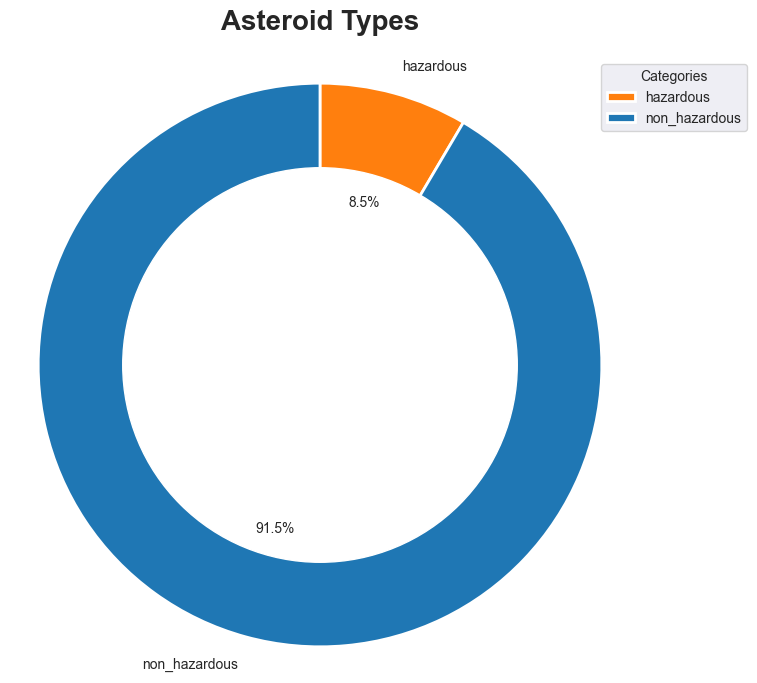

In [192]:
# Generate some example data
labels = ['hazardous', 'non_hazardous']
sizes = [len(hazardous_asteroids), non_hazard]


# Define the colors to use for each category
colors = ['#ff7f0e', '#1f77b4']

# Add some shading to the colors
shade = 0.4
shaded_colors = [(np.array(plt.get_cmap('Set2')(i)[:3]) * (1 - shade)).tolist()
                 for i in range(len(labels))]
                 
# Update the colors with the new colors
for i in range(len(colors)):
    shaded_colors[i] = colors[i]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False,
       colors=shaded_colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Add a circle in the center to make it look like a donut chart
center_circle = plt.Circle((0, 0), 0.7, fc='white')
ax.add_artist(center_circle)

# Add some labels and formatting
ax.axis('equal')
ax.set_title('Asteroid Types', fontsize=20, fontweight='bold', pad=20)
ax.legend(title='Categories', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.setp(ax.spines.values(), linewidth=3)

plt.show()




## Overview Of hazerdous NEO's with histograms

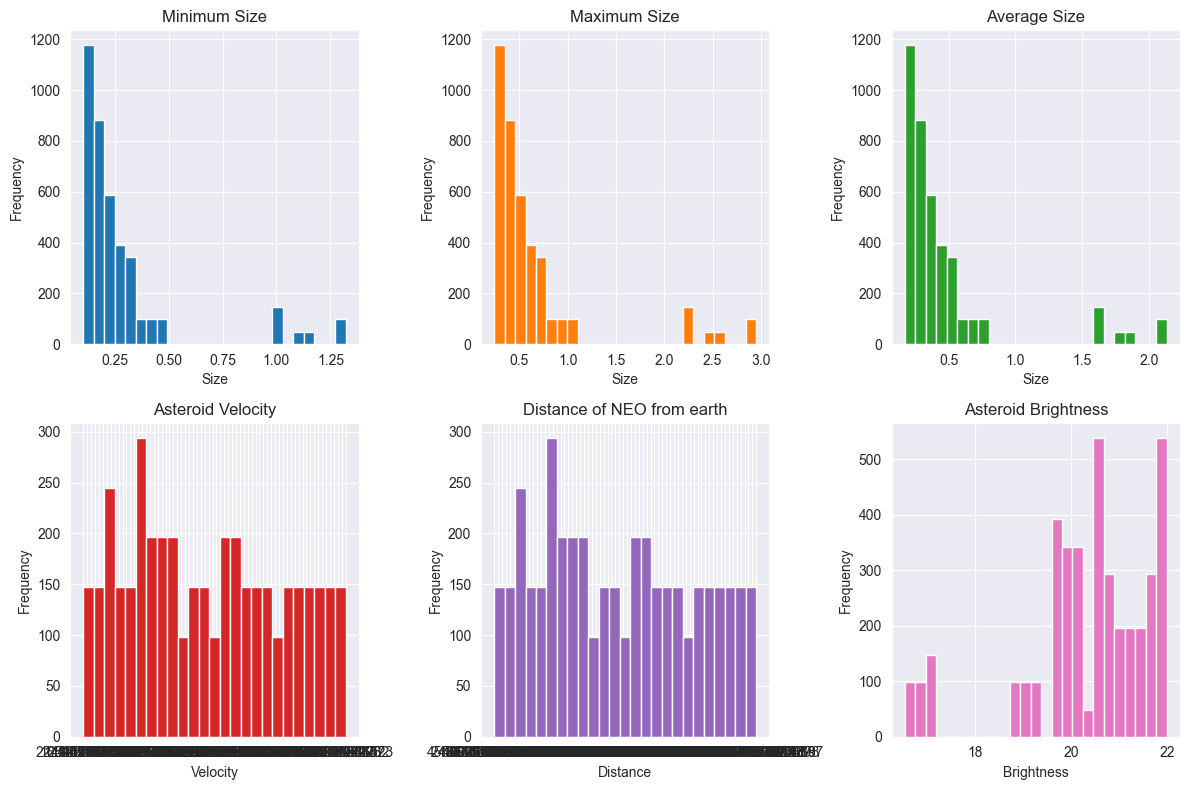

In [195]:
# Set the style of the plot
sns.set_style("darkgrid")

# Set the size of the plot
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Data extraction
size_min_values = [d[3] for d in hazardous_asteroids]
size_max_values = [d[5] for d in hazardous_asteroids]
velocity_values = [d[7] for d in hazardous_asteroids]
distance_values = [d[9] for d in hazardous_asteroids]
brightness_values = [d[11] for d in hazardous_asteroids]
size_average = [(float(x[3]) + float(x[5])) / 2 for x in hazardous_asteroids]

# Set the number of bins
num_bins_1 = 25

# Create histograms
axs[0, 0].hist(size_min_values, bins=num_bins_1, color='tab:blue')
axs[0, 0].set_title('Minimum Size')
axs[0, 0].set_xlabel('Size')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(size_max_values, bins=num_bins_1, color='tab:orange')
axs[0, 1].set_title('Maximum Size')
axs[0, 1].set_xlabel('Size')
axs[0, 1].set_ylabel('Frequency')

axs[0, 2].hist(size_average, bins=num_bins_1, color='tab:green')
axs[0, 2].set_title('Average Size')
axs[0, 2].set_xlabel('Size')
axs[0, 2].set_ylabel('Frequency')

axs[1, 0].hist(velocity_values, bins=num_bins_1, color='tab:red')
axs[1, 0].set_title('Asteroid Velocity')
axs[1, 0].set_xlabel('Velocity')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(distance_values, bins=num_bins_1, color='tab:purple')
axs[1, 1].set_title('Distance of NEO from earth')
axs[1, 1].set_xlabel('Distance')
axs[1, 1].set_ylabel('Frequency')

axs[1,2].hist(brightness_values, bins=num_bins_1, color='tab:pink')
axs[1,2].set_title('Asteroid Brightness')
axs[1,2].set_xlabel('Brightness')
axs[1,2].set_ylabel('Frequency')

# Set the layout and show the plot
plt.tight_layout()

plt.show()


# Heat Map
This heat map shows the pairwise correlations between the attributes of the NEO asteroid data. It tells us which attributes correlate. We will naturally then opt to plot visualizations for such params that tend to correlate closer to 1 but not exactly 1. If two attributes have a correlation of  1, they are either the same attribute or are derived from that attribute. Plotting them against each other is thus meaningless. For example, plotting average size against max size would be pointless. We note that size and brightness(magnitude) would be interesting to plot against each other. 

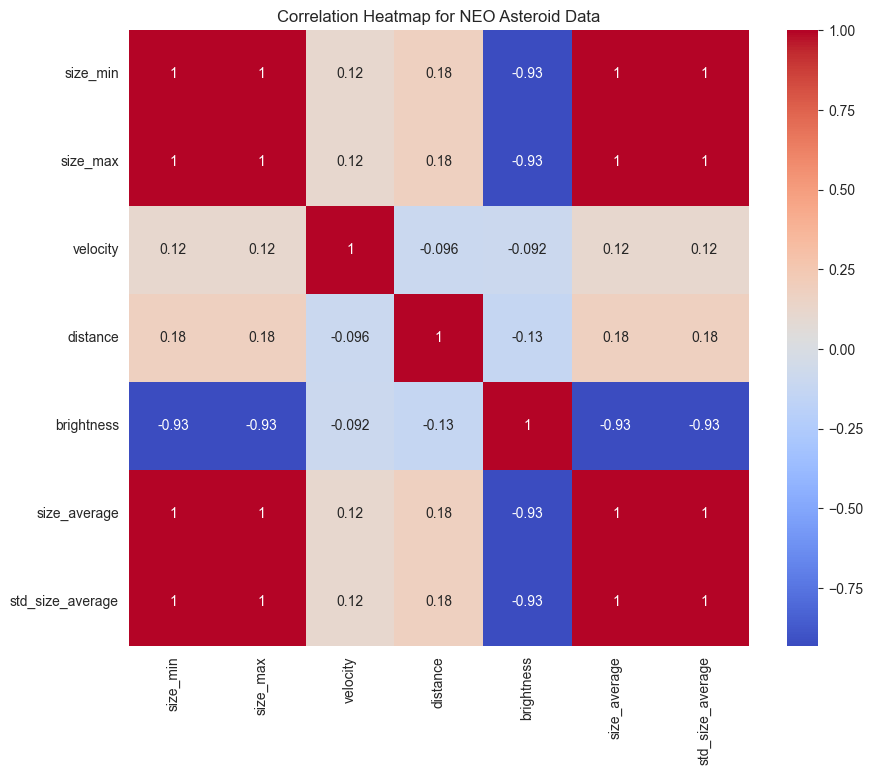

In [207]:

data = realdf2

# Create a correlation matrix of the data
corr = data.corr(numeric_only=True)


# Create the heatmap using seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap for NEO Asteroid Data')

# Display the plot
plt.show()


### Size against brightness plot using a linear line of best fit


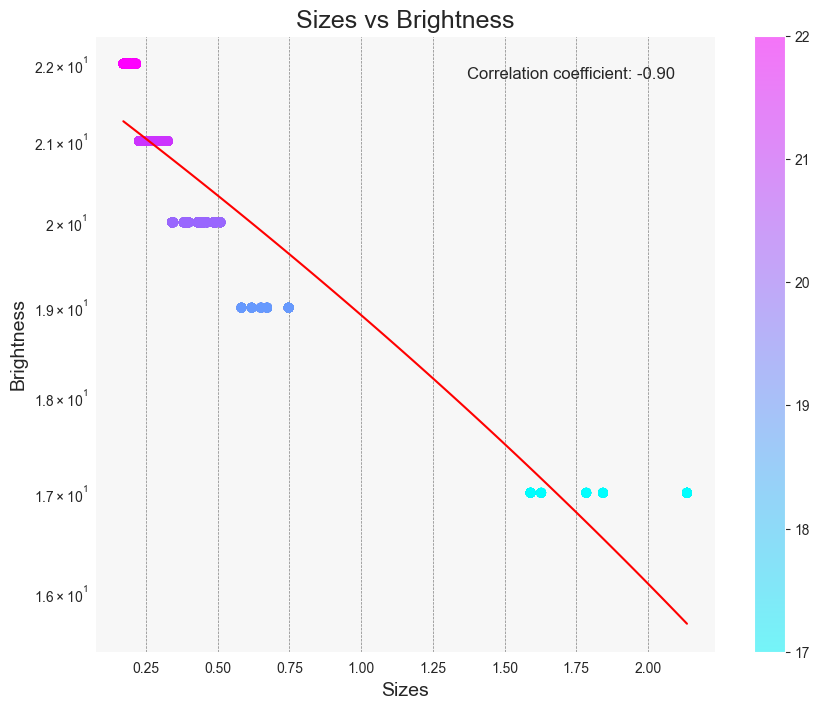

In [215]:
import numpy as np
import matplotlib.pyplot as plt

# convert lists to numpy arrays
size_array = np.array(size_average).astype(np.float64)
brightness_array = np.array(brightness_values).astype(np.float64)

# create scatter plot with cool colors
plt.scatter(size_array, brightness_array, alpha=0.5, c=brightness_array, cmap='cool')

# add axis labels and title
plt.xlabel('Sizes', fontdict={'fontsize': 14})
plt.ylabel('Brightness', fontdict={'fontsize': 14})
plt.title('Sizes vs Brightness', fontdict={'fontsize': 18})

# set logarithmic scale for y-axis
plt.yscale('log')

# fit a linear regression line
slope, intercept = np.polyfit(size_array, brightness_array, 1)
x_range = np.linspace(min(size_array), max(size_array), 100)
plt.plot(x_range, np.polyval([slope, intercept], x_range), color='red')

# compute correlation coefficient
corr_coef = np.corrcoef(size_array, brightness_array)[0, 1]

# add correlation coefficient to plot
plt.text(0.6, 0.95, f'Correlation coefficient: {corr_coef:.2f}', transform=plt.gca().transAxes, va='top', fontdict={'fontsize': 12})

# add legend
plt.colorbar()

# add grid lines
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)

# add background color
plt.gca().set_facecolor('#f7f7f7')

# display plot
plt.show()


### Size against brightness plot using a polynomial line of best fit
The polynomial line seems to fit well. We see a correlation here which we also saw in the heat map.

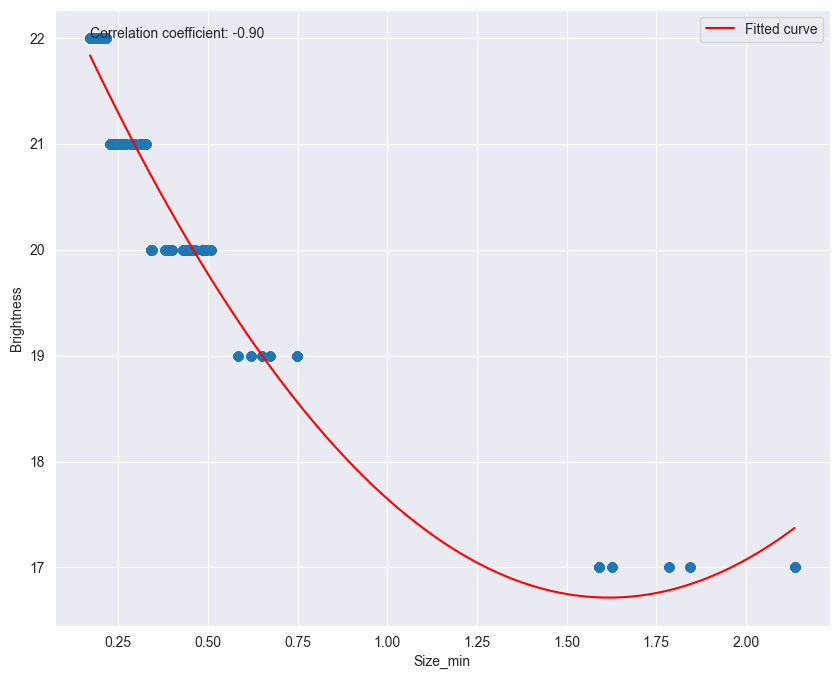

In [216]:
# Calculate the correlation coefficient between size and brightness
corr_coef = np.corrcoef(size_array, brightness_array)[0, 1]

# Fit a quadratic regression model to the data
poly_features = PolynomialFeatures(degree=2, include_bias=False)
size_poly = poly_features.fit_transform(size_array.reshape(-1,1))
lin_reg = LinearRegression()
lin_reg.fit(size_poly, brightness_array)

# Evaluate the model over a range of x values
size_range = np.linspace(size_array.min(), size_array.max(), 100)
size_range_poly = poly_features.transform(size_range.reshape(-1,1))
brightness_range = lin_reg.predict(size_range_poly)

# Plot the scatter plot with fitted curve and correlation coefficient
plt.scatter(size_array, brightness_array)
plt.plot(size_range, brightness_range, color='red', label='Fitted curve')
plt.xlabel('Size_min')
plt.ylabel('Brightness')
plt.legend()
plt.text(size_array.min(), brightness_array.max(), f'Correlation coefficient: {corr_coef:.2f}', fontsize=10)
plt.show()

No real correlation between the size of an NEO and the miss distance od said NEO from earth 

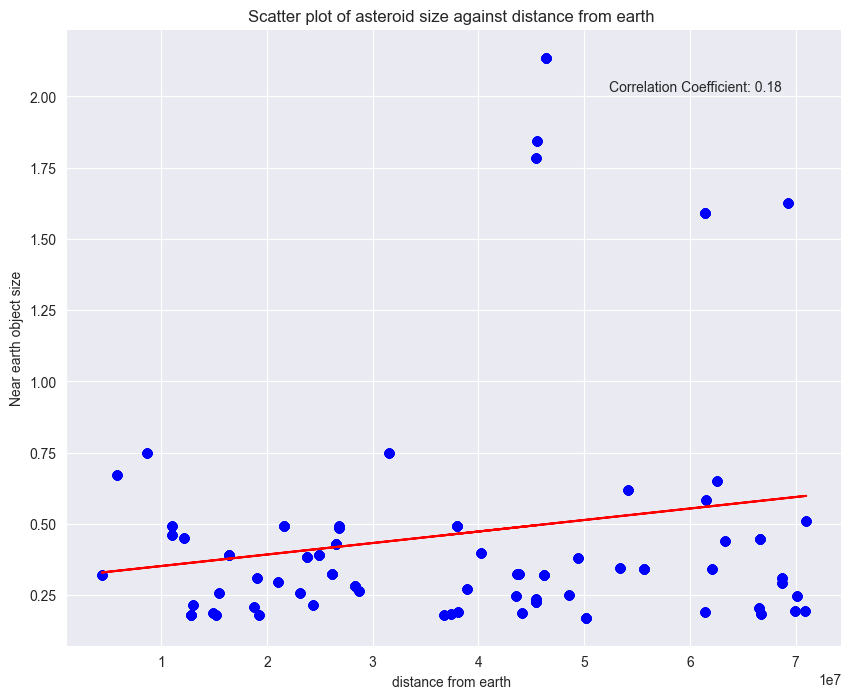

In [197]:
# Create two lists of data
x = distance_values
y = size_average


# Convert arrays to float data type
x = np.array(x).astype(float)
y = np.array(y).astype(float)

# Apply mathematical operation
result = np.maximum(x, y)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope*np.array(x) + intercept

# Create scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y, color='blue')

# Add the line of best fit
ax.plot(x, line, color='red')

# Add labels and title
plt.xlabel('distance from earth ')
plt.ylabel('Near earth object size')
plt.title('Scatter plot of asteroid size against distance from earth ')

# Add correlation coefficient
corr_coef = r_value.round(2)
ax.text(0.7, 0.9, f'Correlation Coefficient: {corr_coef}', transform=ax.transAxes)

# Customize the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Display the plot
plt.show()

**Absolute Magnitude** :
- Absolute Magnitude is defined as the apparent magnitude an object would have when the NEO is located at a distance of 10 parsecs. So, for example, the apparent magnitude of the Sun is -26.7. It is the brightest celestial object we can see from Earth.
- https://lco.global/spacebook/distance/what-absolute-magnitude/#:~:text=Absolute%20magnitude%20is%20defined%20to,we%20can%20see%20from%20Earth.

The mode NEO has a brightness of 20. Larger dots depict that there are more objects with this level of magnitude.

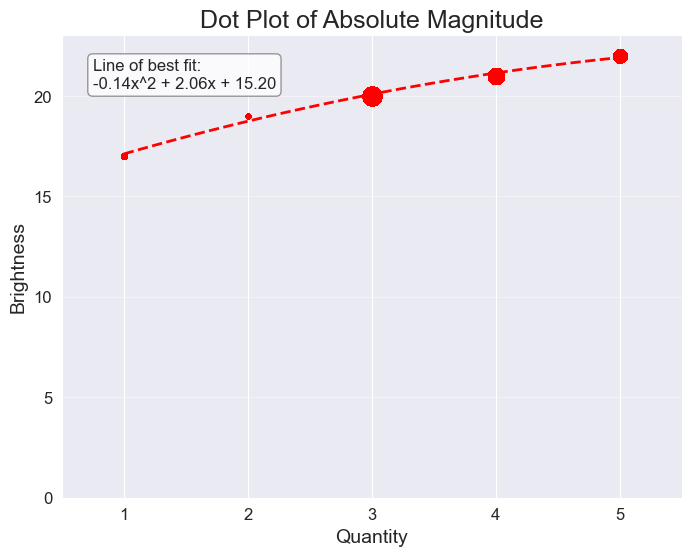

In [199]:
# Round the brightness values to the nearest whole number
brightness_values = [d[11] for d in hazardous_asteroids]
brightness_values = [round(b) for b in brightness_values]

# Calculate the frequencies of each brightness value
brightness_freq = {b: brightness_values.count(b) for b in set(brightness_values)}

# Sort the brightness values in ascending order
brightness_sorted = sorted(brightness_freq.keys())

# Create a list of sizes for the circles
sizes = [10*brightness_freq[b] for b in brightness_sorted]

# Create the dot plot
fig, ax = plt.subplots(figsize=(8, 6))
for i, b in enumerate(brightness_sorted):
    ax.plot([i+1]*brightness_freq[b], [b]*brightness_freq[b],
            'o', markersize=13*brightness_freq[b]/max(brightness_freq.values()), color='red')

# Add labels and title
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Brightness', fontsize=14)
plt.title('Dot Plot of Absolute Magnitude', fontsize=18)

# Customize the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylim([0, max(brightness_sorted)+1])
ax.set_xlim([0.5, len(brightness_sorted)+0.5])
plt.grid(axis='y', alpha=0.4)

# Add line of best fit
x = np.array([i+1 for i in range(len(brightness_sorted))])
y = np.array(brightness_sorted)
p = np.polyfit(x, y, 2)
xfit = np.linspace(1, len(brightness_sorted), 100)
yfit = np.polyval(p, xfit)
ax.plot(xfit, yfit, color='red', linestyle='--', linewidth=2)

# Add info about line of best fit
textstr = f'Line of best fit:\n{p[0]:.2f}x^2 + {p[1]:.2f}x + {p[2]:.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='grey')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Display the plot
plt.show()


### Distribution of velocities in a histogram. 
High standard deviation which conveys that there is a large range of values. 

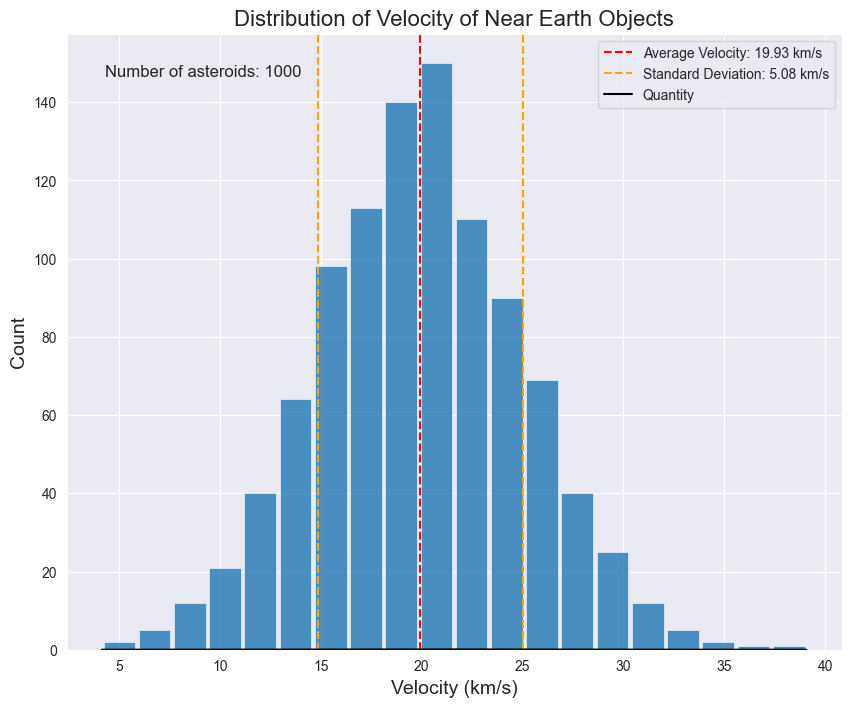

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# generate some sample data
velocities = np.random.normal(loc=20, scale=5, size=1000)

# compute the average velocity and standard deviation
avg_velocity = np.mean(velocities)
std_velocity = np.std(velocities)

# add vertical lines to indicate the average velocity and standard deviation
plt.axvline(x=avg_velocity, color='red', linestyle='--', label=f'Average Velocity: {avg_velocity:.2f} km/s')
plt.axvline(x=avg_velocity + std_velocity, color='orange', linestyle='--', label=f'Standard Deviation: {std_velocity:.2f} km/s')
plt.axvline(x=avg_velocity - std_velocity, color='orange', linestyle='--')

# plot a Quantity curve over the histogram
quantity = gaussian_kde(velocities)
xs = np.linspace(min(velocities), max(velocities), 200)
plt.plot(xs, quantity(xs), color='black', label='Quantity')

# adjust the bar width and color
num_bins = 20
plt.hist(velocities, bins=num_bins, color='#1f77b4', edgecolor='#ffffff', alpha=0.8, density=False, linewidth=0.5, rwidth=0.9)

# add some text to the plot
plt.text(0.05, 0.95, f'Number of asteroids: {len(velocities)}', transform=plt.gca().transAxes, fontsize=12, va='top')

# set the x-axis label and title
plt.xlabel('Velocity (km/s)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Velocity of Near Earth Objects', fontsize=16)

# add a legend to the plot
plt.legend()

# show the plot
plt.show()


# A Pareto Chart 


Here we plot thew cumulative absolute magnitude of the brightnest NEO's

[('50141764.704518094', 22.0), ('15147935.837184751', 21.9), ('19252983.414496872', 21.9), ('36754020.473744897', 21.9), ('12845036.414019698', 21.9), ('37363069.246164549', 21.86), ('66697555.54962301', 21.83), ('14933405.221148269', 21.8), ('44141371.474740789', 21.8), ('61410218.816905626', 21.75)]


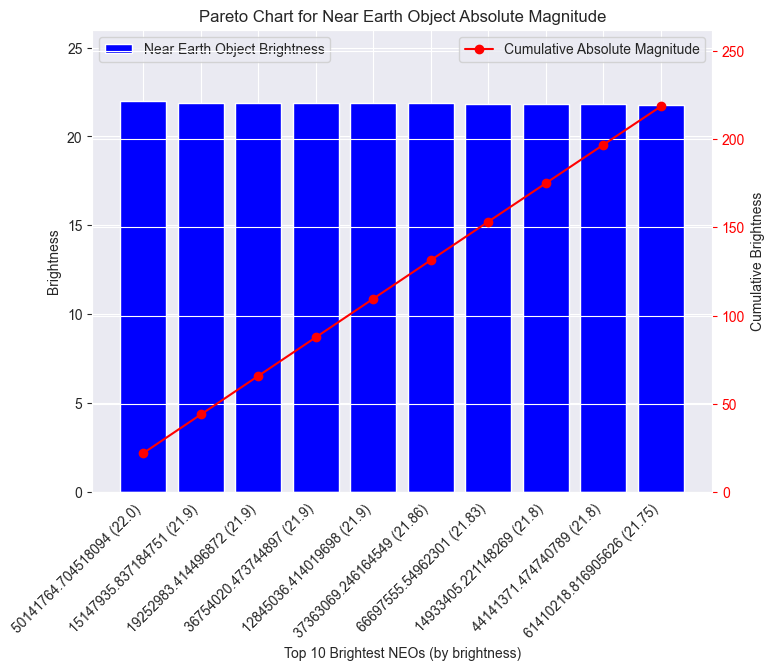

In [243]:
# Create a list of tuples with distance and brightness
neos_dist_brightness = [(x[-3], x[-1]) for x in hazardous_asteroids]

unique_neos_dist_brightness = list(set(neos_dist_brightness))
top10 = sorted(unique_neos_dist_brightness, key=lambda x: x[1], reverse=True)[:10]

print(top10)
# Calculate the cumulative brightness
cumulative_brightness = [top10[0][1]]
for i in range(1, len(top10)):
    cumulative_brightness.append(cumulative_brightness[-1] + top10[i][1])

# Create a bar chart for NEO brightness
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.bar(range(len(top10)), [x[1] for x in top10], color='blue')
ax1.set_xlabel('Top 10 Brightest NEOs (by brightness)')
ax1.set_ylabel('Brightness')
ax1.set_xticks(range(len(top10)))
ax1.set_xticklabels([f'{x[0]} ({x[1]})' for x in top10], rotation=45, ha='right')
ax1.set_ylim([0, int(max([x[1] for x in top10])*1.2)])
ax1.tick_params(axis='y')

# Create a line plot for cumulative brightness
ax2 = ax1.twinx()
ax2.plot(range(len(top10)), cumulative_brightness, color='red', marker='o')
ax2.set_ylabel('Cumulative Brightness')
ax2.set_ylim([0, int(max(cumulative_brightness)*1.2)])
ax2.tick_params(axis='y', colors='red')

# Set chart title and legend
ax1.set_title('Pareto Chart for Near Earth Object Absolute Magnitude')
ax1.legend(['Near Earth Object Brightness'], loc='upper left')
ax2.legend(['Cumulative Absolute Magnitude'], loc='upper right')

# Show the chart
plt.show()


# A Radar Spider Chart 

This is my favourite chart. At a quick glance we can see what qualities a hazerdous asteroifd has in comparison to a non hazerdous one. By an large the main factor is size. The larger the object , the more. of a potential hazerd it is. 

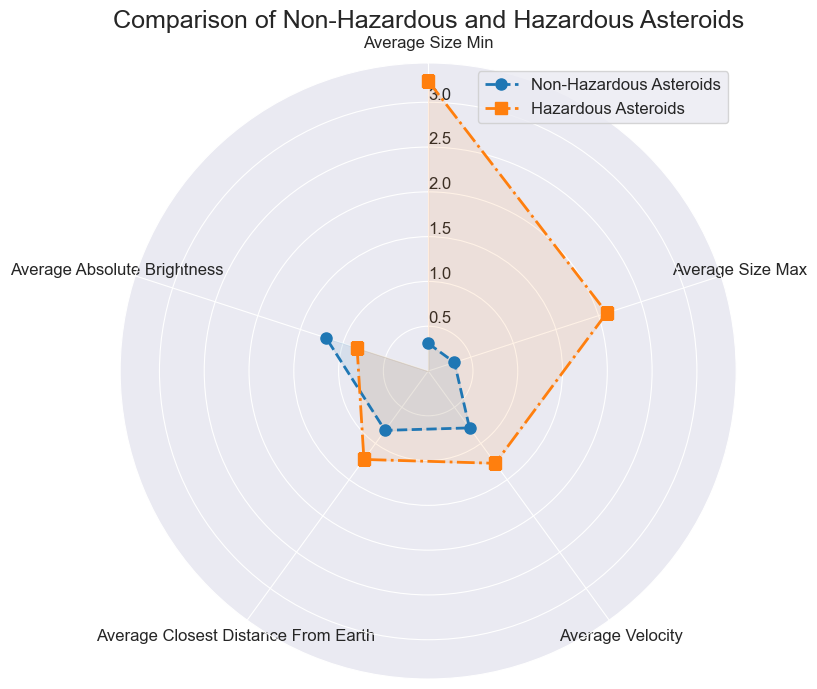

In [202]:
# Data
size_min_mean_ratio = size_min_mean / hazardous_asteroids_size_min_mean 
size_max_mean_ratio = size_max_mean / hazardous_asteroids_size_max_mean 
velocity_mean_ratio = velocity_mean / hazardous_asteroids_velocity_mean 
distance_mean_ratio = distance_mean / hazardous_asteroids_distance_mean 
brightness_mean_ratio = brightness_mean / hazardous_asteroids_brightness_mean

non_hazardous_asteroids_list = [size_min_mean_ratio, size_max_mean_ratio, velocity_mean_ratio, distance_mean_ratio, brightness_mean_ratio]

hazardous_asteroids_size_min_mean_ratio =  hazardous_asteroids_size_min_mean / size_min_mean 
hazardous_asteroids_size_max_mean_ratio =  hazardous_asteroids_size_max_mean / size_max_mean_ratio 
hazardous_asteroids_velocity_mean_ratio =  hazardous_asteroids_velocity_mean / velocity_mean 
hazardous_asteroids_distance_mean_ratio =  hazardous_asteroids_distance_mean / distance_mean 
hazardous_asteroids_brightness_mean_ratio = hazardous_asteroids_brightness_mean / brightness_mean 

hazardous_asteroids_list = [hazardous_asteroids_size_min_mean_ratio, hazardous_asteroids_size_max_mean_ratio,
                       hazardous_asteroids_velocity_mean_ratio, hazardous_asteroids_distance_mean_ratio, 
                       hazardous_asteroids_brightness_mean_ratio]

categories = ['Average Size Min', 'Average Size Max', 'Average Velocity', 'Average Closest Distance From Earth', 'Average Absolute Brightness']

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories), endpoint=False)
width = 2 * np.pi / len(categories)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Set r axis
ax.set_rlim(0, max(max(non_hazardous_asteroids_list), max(hazardous_asteroids_list)) + 0.2)

# Plot lines
for i, (restaurant, label, linestyle, marker, color) in enumerate(zip([non_hazardous_asteroids_list, hazardous_asteroids_list], 
                                                                ['Non-Hazardous Asteroids', 'Hazardous Asteroids'], 
                                                                ['--', '-.'], 
                                                                ['o', 's'], 
                                                                ['C0', 'C1'])):
    ax.plot(label_loc, restaurant, label=label, linewidth=2, linestyle=linestyle, marker=marker, markersize=8, color=color)
    ax.fill_between(label_loc, restaurant, alpha=0.1, color=color)

# Add labels, grid, and legend
lines, labels = ax.set_thetagrids(np.degrees(label_loc), labels=categories, fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True)
ax.legend(fontsize=12)

# Add title
plt.title('Comparison of Non-Hazardous and Hazardous Asteroids', fontsize=18)

plt.show()


# Box plot


Here we see the range of values. The estimated size range is quite large

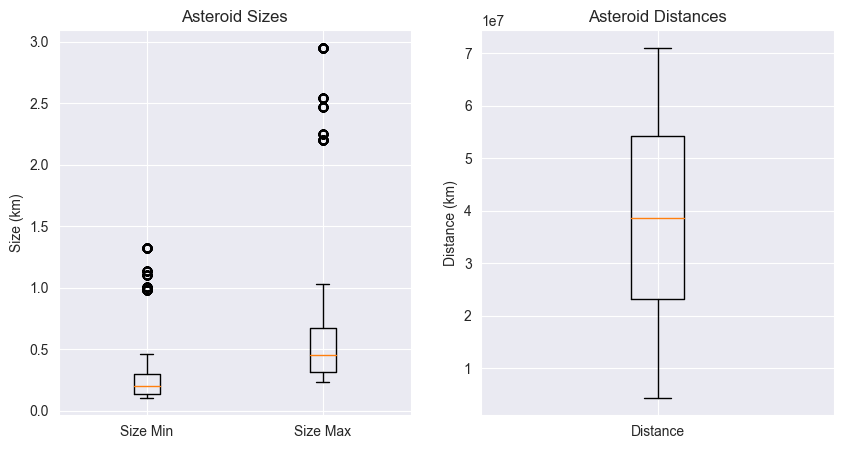

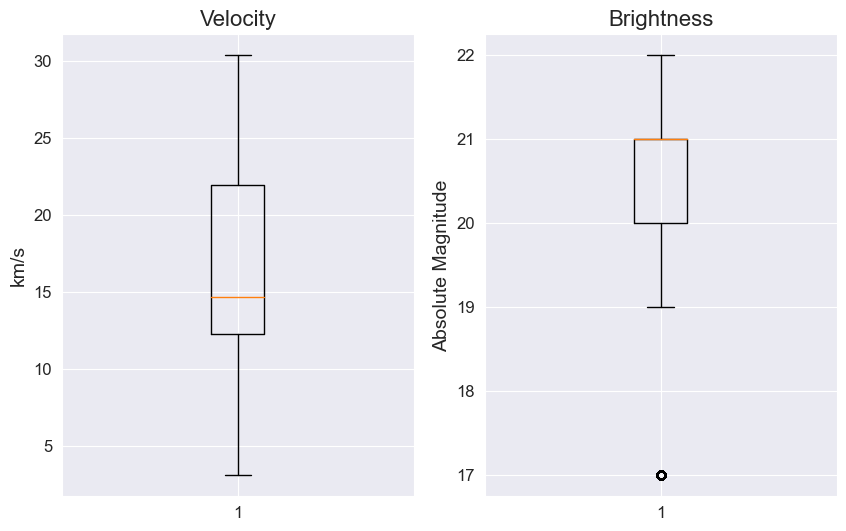

In [204]:
import matplotlib.pyplot as plt


# Extract data for box plot
sizes_min = size_min_values
sizes_max = size_max_values
distances = [float(d) for d in distance_values]
velocities = [float(d) for d in velocity_values]
brightnesses = brightness_values

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create box plot for sizes
axs[0].boxplot([sizes_min, sizes_max])
axs[0].set_xticklabels(['Size Min', 'Size Max'])
axs[0].set_ylabel('Size (km)')
axs[0].set_title('Asteroid Sizes')

# Create box plot for distances
axs[1].boxplot([distances])
axs[1].set_xticklabels(['Distance'])
axs[1].set_ylabel('Distance (km)')
axs[1].set_title('Asteroid Distances')

# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

# Velocity box plot
ax1.boxplot(velocities)
ax1.set_title('Velocity', fontsize=16)
ax1.set_ylabel('km/s', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)

# Brightness box plot
ax2.boxplot(brightnesses)
ax2.set_title('Brightness', fontsize=16)
ax2.set_ylabel('Absolute Magnitude', fontsize=14)
ax2.tick_params(axis='both', labelsize=12)

# Show plot
plt.show()


# Tree map
The size of each rectangle represents the velocity. We see that the velocity range is not large. Ie most rectangles are roughly the same size. i.e. The range of NEO velocities is small. 

In [205]:
realdf2
df_ab = df.iloc[:, [0,1, 2,3,4,5]]
df_first_500 = df.iloc[:500]


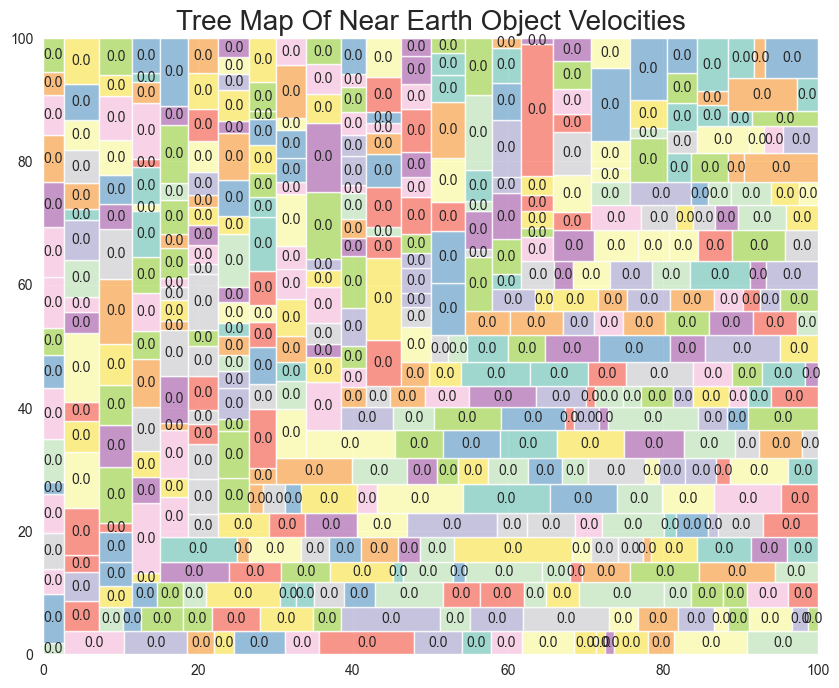

In [206]:
# convert non-numeric values to zero
df_first_500 = df_first_500.apply(pd.to_numeric, errors='coerce').fillna(0)

# calculate the total sum of values
total = df_first_500.values.sum()

# drop rows with NaN values
df_first_500 = df_first_500.dropna()

# create tree map of Velocity
values = df_first_500.iloc[:, 3].tolist()
normalized_values = [v/total for v in values]

label = df_first_500['Near Earth Object Name']

# generate a random color palette
cmap = matplotlib.colormaps['Set3']
colors = [matplotlib.colors.rgb2hex(cmap(random.random())) for i in range(len(label))]

# plot the tree map
fig, ax = plt.subplots(figsize=(10, 8))
squarify.plot(sizes=normalized_values, label=label, alpha=.8, color=colors, ax=ax, edgecolor='w')

# add title and axis labels
plt.title("Tree Map Of Near Earth Object Velocities", fontsize=20)
plt.axis('on')
plt.show()


# Correlelogram
Displays the correlation between a time series and its own past values. We see a lot of concistency. This is because our data set is relatively large so the small anomalies and outliers do not affect the data set results much visually . 

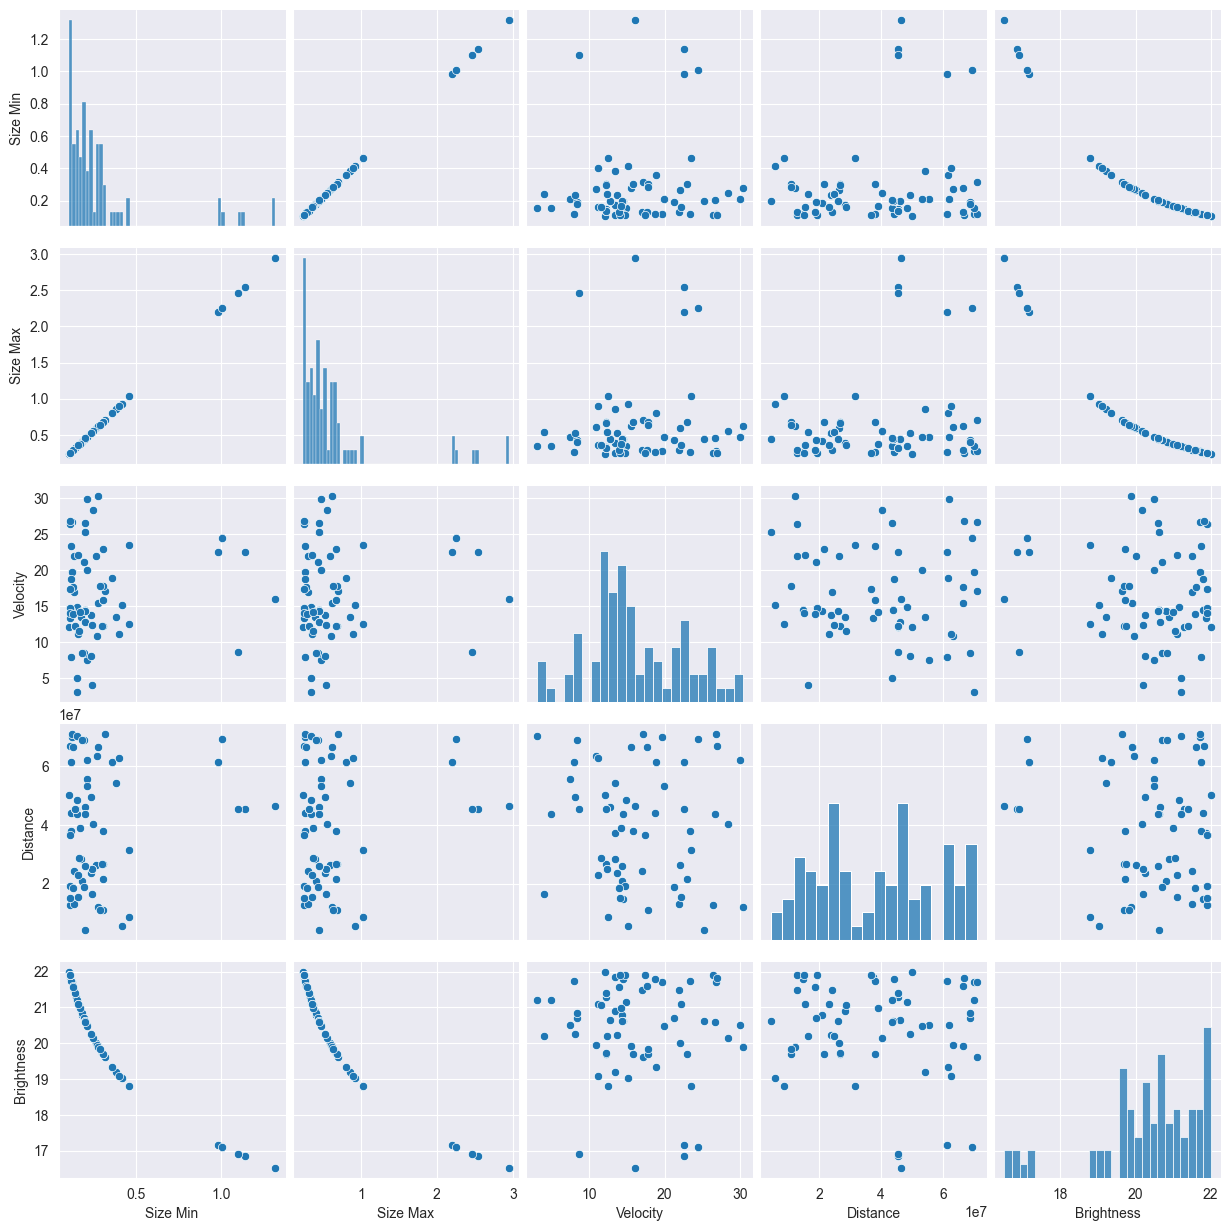

In [208]:
data = np.array(hazardous_asteroids)

# Convert data to DataFrame
df = pd.DataFrame(data[:, [1, 3, 5, 7, 9, 11]], columns=['Name', 'Size Min', 'Size Max', 'Velocity', 'Distance', 'Brightness'])
df[['Size Min', 'Size Max', 'Velocity', 'Distance', 'Brightness']] = df[['Size Min', 'Size Max', 'Velocity', 'Distance', 'Brightness']].apply(pd.to_numeric)

# Create correlogram using pairplot
sns.pairplot(df)


### Task 3 - challenges 

- Firstly the data did not allow me to return a large data set. It was restricted to near earth objects from within the last 7 days. To overcome this we use a for loop with specified dates using the date object. We can now get a larger data set by specifying the start and end dates we want to use. The api spits out jsons and we join them together in a smart manner for later analysis. 

- The jsons are added in an itterative fashion so one might expect the first date to be added first, the second date specified to be added second and so on in an itterative manner. In reality the dates are added at ranodom, the same way as would be in a hashmap. If we want to analyse data by the days of the week we would have a problem. Luckily a key is added to each json item. This prevents json data being overwritten and keeps track of which date the information specified is for. 

- There is a lot of data and it is difficult to know what attributes to compare to one another. There are many many combination. I did not even pick all attributes for our data set. A heat map can provide insights in to what attributes may be nice to plot against eachother. and this is how |I overcame that challenghe. 



### Task 3 - Insights 

- The kley ionsights I gained are that larger objects are potentially more hazerdous and that the distance the asteroid is from eath is not as an important factor in whetehr or not a NEO is hazerodus. The speed is also not a facotr. 

- Most NEO's are non hazerdous. 

- The range of Velocities is quiet large and is the range of brightness.

- The range in size is large too. 

- There are many NEO's that NASA keep an eye on to see if they change trajectory and may become potentially hazerdous. You need to be within a certain miss diatnce to be within the hazerdous caregory. 

### Task 3 - challenges 
- In the future other NEO attributes can be analysed such as whether it is a sentry object. 

- This analysis can also be conducted on other orbiting bodies such as mars. Currently these are only done for near earth objects. One could add anlaysis on near mars obnjects. 

- One can also add in NASA's weather service REST API and see if the trajectory of NEO's changes per day given different space weather condition. This can be pploytted in a time graph plot. 